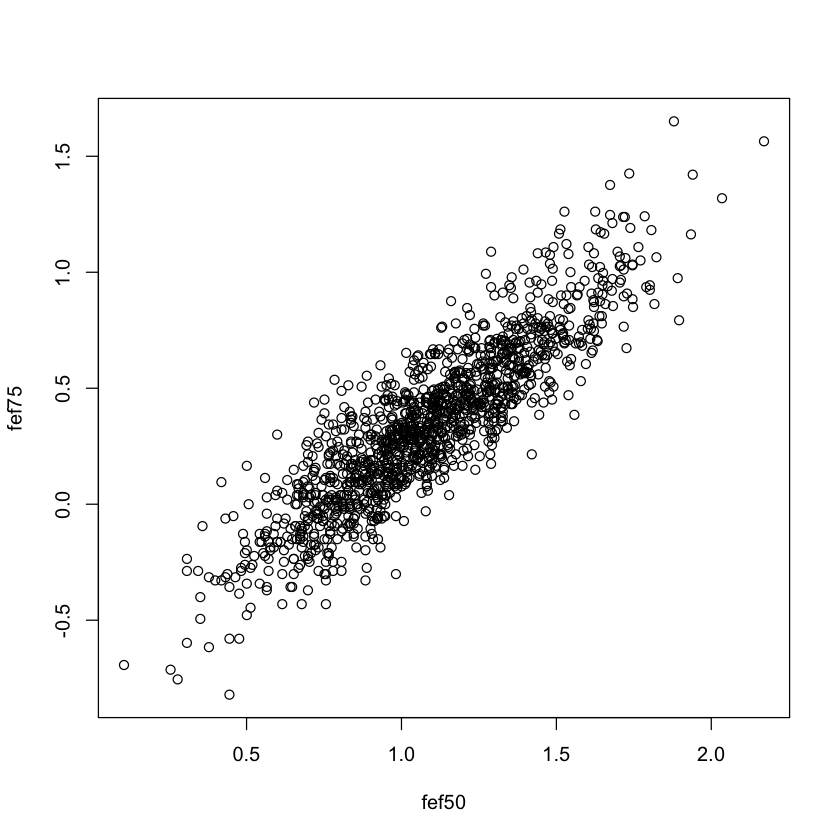

In [3]:
resp <- read.csv("../../data/resp/resp.csv", header = TRUE)

# (airflow at 50% and 75% of completing exhalation, log-transformed to obtain a closer-to-Normal distribution)
plot(log(resp$fef50), log(resp$fef75), xlab = "fef50", ylab = "fef75")

In [5]:
### T^2 test statistic
Tsq_test <- function(outcome, var_group){

    g1 <- resp[,var_group] == 0
    g2 <- resp[,var_group] == 1
    n1 <- sum(g1)
    n2 <- sum(g2)
    d <- ncol(outcome)

    xbar1 <- colMeans(outcome[g1,])
    xbar2 <- colMeans(outcome[g2,])

    S1 <- cov(outcome[g1,])
    S2 <- cov(outcome[g2,])
    S  <- (S1 * (n1 - 1) + S2 * (n2 - 1))/(n1 + n2 - 2)
    Sinv <- solve(S)

    T2 <- ((n1*n2) / (n1 + n2)) * sum((xbar1 - xbar2) * drop(Sinv %*%  (xbar1 - xbar2)))
    T2_rescaled <- (n1 + n2 - d - 1)/((n1 + n2 - 2)*d) * T2
    pval <- 1 - pf(T2_rescaled, df1 = d,  df2=n1 + n2 - d - 1)

    return(list(T2 = T2, pval = pval))
}

In [6]:
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "allergy")
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "laryngitis")
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "mother_smokes")
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "father_smokes")
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "freq_cold")
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "freq_cough")
resp$sex  <- resp$sex - 1 # sex is code as "2" and "1"
Tsq_test(cbind(log(resp$fef50), log(resp$fef75)), "sex")

$T2
[1] 0.412893

$pval
[1] 0.8136233

$T2
[1] 4.481498

$pval
[1] 0.1069644

$T2
[1] 16.44888

$pval
[1] 0.0002837474

$T2
[1] 0.2338054

$pval
[1] 0.8897597

$T2
[1] 1.449397

$pval
[1] 0.4849294

$T2
[1] 7.397956

$pval
[1] 0.02507569

$T2
[1] 12.72202

$pval
[1] 0.001789615

In [7]:
### Likelihood ratio test
library(mvtnorm)
LR_test <- function(outcome, var_group){

    g1 <- resp[,var_group] == 0
    g2 <- resp[,var_group] == 1
    n1 <- sum(g1)
    n2 <- sum(g2)
    d <- ncol(outcome)

    xbar1 <- colMeans(outcome[g1,])
    xbar2 <- colMeans(outcome[g2,])

    outcome_g1_centered <- t(apply(outcome[g1,], 1, function(z) z - xbar1))
    outcome_g2_centered <- t(apply(outcome[g2,], 1, function(z) z - xbar2))
    S12 <- crossprod(rbind(outcome_g1_centered, outcome_g2_centered)) / (n1 + n2)


    LR1 <- sum(dmvnorm(outcome[g1,], mean = xbar1, sigma = S12, log = TRUE))
    LR2 <- sum(dmvnorm(outcome[g2,], mean = xbar2, sigma = S12, log = TRUE))
    LR12 <- LR1 + LR2

    # log-likelihood under restriction
    xbar <- colMeans(outcome)
    S <- cov(outcome) * (n1 + n2 - 1)/(n1 + n2)

    LR_res <- sum( dmvnorm(outcome, mean = xbar, sigma = S, log = TRUE) )

    LR_statistic <- 2 * (-(LR_res - LR12))
    pval <- 1 - pchisq(LR_statistic, df = d)

    return(list(LR_statistic = LR_statistic, pval = pval))
}

In [8]:
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "allergy")
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "laryngitis")
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "mother_smokes")
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "father_smokes")
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "freq_cold")
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "freq_cough")
LR_test(cbind(log(resp$fef50), log(resp$fef75)), "sex")

$LR_statistic
[1] 0.4134539

$pval
[1] 0.8132417

$LR_statistic
[1] 4.480686

$pval
[1] 0.106422

$LR_statistic
[1] 16.372

$pval
[1] 0.0002785251

$LR_statistic
[1] 0.2341389

$pval
[1] 0.8895234

$LR_statistic
[1] 1.450796

$pval
[1] 0.4841318

$LR_statistic
[1] 7.38848

$pval
[1] 0.02486635

$LR_statistic
[1] 12.68028

$pval
[1] 0.001764051